In [1]:
import pandas as pd
import missingno as msno
import numpy as np
from missingpy import MissForest

In [2]:
file = "../../../../../dataframes/ensu/df_09.csv"

In [3]:
df = pd.read_csv(file)

In [4]:
df.head()

,BP1_1,BP1_2_01,BP1_2_02,BP1_2_03,BP1_2_04,BP1_2_05,BP1_2_06,BP1_2_07,BP1_2_08,BP1_2_09,...,BP3_1_12,BP3_1_13,BP3_1_14,BP3_1_15,BP3_1_99,BP3_2,CVE_ENT,CVE_MUN,EST,LOC
0,2,1,3,2,3,1,2,2,2,2,...,0.0,0.0,0.0,0.0,0.0,3.0,9,2,3,1
1,2,2,2,2,1,2,2,2,2,2,...,1.0,1.0,0.0,0.0,0.0,4.0,9,2,3,1
2,2,1,1,2,3,1,1,1,2,3,...,0.0,0.0,0.0,0.0,0.0,3.0,9,2,3,1
3,1,1,1,1,3,1,1,1,2,2,...,1.0,0.0,0.0,0.0,0.0,3.0,9,2,3,1
4,2,2,2,2,3,2,1,2,2,3,...,1.0,0.0,0.0,0.0,0.0,3.0,9,2,2,1


In [5]:
df_copy = df.copy()

In [6]:
df_copy.replace(to_replace=np.NaN,
                                  value= -1,
                                  inplace=True)

In [7]:
for column in df_copy.columns:
    df_copy[column] = df_copy[column].astype('int64')

In [8]:
df_copy.replace(to_replace=-1,
                                  value=np.NaN,
                                  inplace=True)

In [9]:
df_copy.shape

(8718, 52)

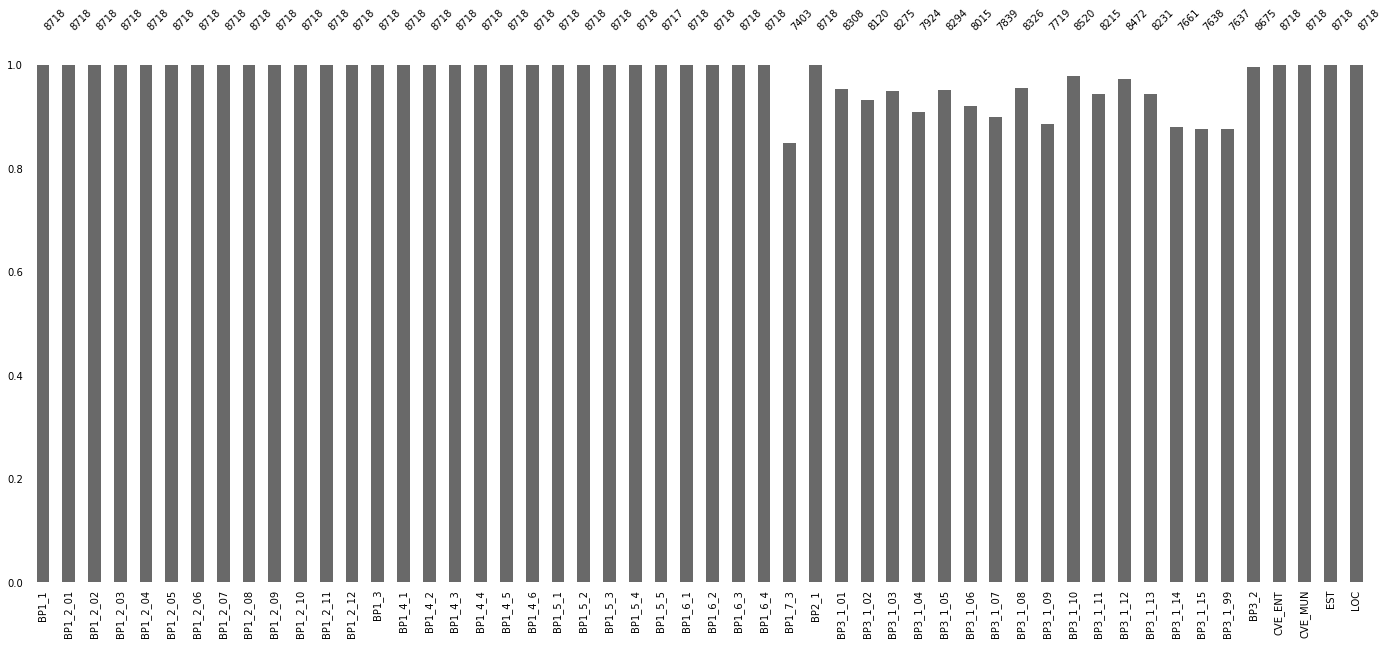

In [10]:
msno.bar(df_copy, fontsize=10)
#plt.xlabel('Columnas', fontsize=30)
#plt.ylabel('Observaciones', fontsize=30)
#plt.savefig('../../../images/envipe/df_tmod_vic_envipe2016_09_nan_ident.png', dpi=300)

In [11]:
df_copy.replace(to_replace=np.NaN,
                                  value= -1,
                                  inplace=True)

In [12]:
threshold = round(df_copy.shape[0]*1)
threshold

8718

In [13]:
l = []
for column in df_copy.columns:
    na_column =  df_copy[column].value_counts().get(-1)
    if(na_column != None):
        print(column, ': ', df_copy.shape[0] - na_column, ' - ', threshold)
        if (df_copy.shape[0] - na_column < threshold):
            l.append(column)

BP1_5_5 :  8717  -  8718
BP1_7_3 :  7403  -  8718
BP3_1_01 :  8308  -  8718
BP3_1_02 :  8120  -  8718
BP3_1_03 :  8275  -  8718
BP3_1_04 :  7924  -  8718
BP3_1_05 :  8294  -  8718
BP3_1_06 :  8015  -  8718
BP3_1_07 :  7839  -  8718
BP3_1_08 :  8326  -  8718
BP3_1_09 :  7719  -  8718
BP3_1_10 :  8520  -  8718
BP3_1_11 :  8215  -  8718
BP3_1_12 :  8472  -  8718
BP3_1_13 :  8231  -  8718
BP3_1_14 :  7661  -  8718
BP3_1_15 :  7638  -  8718
BP3_1_99 :  7637  -  8718
BP3_2 :  8675  -  8718


In [14]:
l

['BP1_5_5',
 'BP1_7_3',
 'BP3_1_01',
 'BP3_1_02',
 'BP3_1_03',
 'BP3_1_04',
 'BP3_1_05',
 'BP3_1_06',
 'BP3_1_07',
 'BP3_1_08',
 'BP3_1_09',
 'BP3_1_10',
 'BP3_1_11',
 'BP3_1_12',
 'BP3_1_13',
 'BP3_1_14',
 'BP3_1_15',
 'BP3_1_99',
 'BP3_2']

In [15]:
df_copy[df_copy.columns[~df_copy.columns.isin(l)]].head()

,BP1_1,BP1_2_01,BP1_2_02,BP1_2_03,BP1_2_04,BP1_2_05,BP1_2_06,BP1_2_07,BP1_2_08,BP1_2_09,...,BP1_5_4,BP1_6_1,BP1_6_2,BP1_6_3,BP1_6_4,BP2_1,CVE_ENT,CVE_MUN,EST,LOC
0,2,1,3,2,3,1,2,2,2,2,...,3,0,0,0,0,2,9,2,3,1
1,2,2,2,2,1,2,2,2,2,2,...,1,1,0,0,0,2,9,2,3,1
2,2,1,1,2,3,1,1,1,2,3,...,3,1,0,0,0,2,9,2,3,1
3,1,1,1,1,3,1,1,1,2,2,...,2,1,0,1,1,2,9,2,3,1
4,2,2,2,2,3,2,1,2,2,3,...,3,1,0,0,0,2,9,2,2,1


In [16]:
df_copy.replace(to_replace=-1,value=np.NaN,inplace=True)

In [17]:
imputer = MissForest()
X_imputed = imputer. fit_transform(df_copy)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5


In [18]:
df_copy_copy = df_copy.copy()

In [19]:
df_copy_copy = pd.DataFrame(data=X_imputed, columns=df_copy_copy.columns)

In [20]:
for column in df_copy_copy.columns:
    df_copy_copy[column] = df_copy_copy[column].astype('int64')

In [21]:
df_copy_copy.isnull().any().any()

False

In [23]:
df_copy_copy.shape

(8718, 52)

In [24]:
df.shape

(8718, 52)

In [26]:
list_ids = ['CVE_ENT', 'CVE_MUN', 'LOC']

In [31]:
df_copy_copy.drop(labels=list_ids, axis=1, inplace=True)

In [32]:
file = "../../../../../dataframes/ensu/df_09_impute.csv"

In [33]:
df_copy_copy.to_csv(file,index = False, header = True, sep = ',', encoding = 'utf-8')